# Rough Order of Magnitude Derivation of Ohm's Law

__This is for fun. The material is not required.__

Electrical conductors typically have [resistivities](https://en.wikipedia.org/wiki/Electrical_resistivity_and_conductivity) of order $10^{-8}\,\Omega\cdot\mathrm{m}$.  We can roughly estimate this resistivity using the semi-classical [Drude model](https://en.wikipedia.org/wiki/Drude_model), which dates to Paul Drude in 1900.

## Drude model
This is the simplest sort of Drude model. It can be improved a little by removing approximations, but ultimately it had only little success. A really accurate theory of electrical conductivity requires quantum mechanics, including band theory, phonon-electron scattering, and Fermi-Dirac statistics. I am confident that you could master these subjects (and indeed, some will choose to do so!), but they are beyond the scope of PHSX 261.

Imagine a lattice of metal atoms, with the [atomic diameter](https://en.wikipedia.org/wiki/Atomic_radii_of_the_elements_(data_page)) $l$ equivalent to the spacing of atoms in the lattice. Each atom has $n$ valence electrons. Conceptually, we imagine the valence electrons as being free enough from their atoms to form an ideal gas within the metal. Using the concept of [_equipartition_](https://en.wikipedia.org/wiki/Equipartition_theorem) (you'll learn this soon in Physics 3), at temperature $T$ each degree of freedom in the gas has $\frac{1}{2}kT$ of energy on average, where $k$ is Boltzmann's constant. Each electron has three degrees of freedom, corresponding to velocity in three dimensions. Therefore, the mean thermal kinetic energy of the electron is
$$
    \frac{1}{2} mv_{th}^2 = \frac{1}{2} m (v_x^2 + v_y^2 + v_z^2) = \frac{3}{2}kT.
$$
Therefore, the thermal speed is
$$
    v_{th} = \sqrt{\frac{3kT}{m}}.
$$
Plugging in $T=300\,\mathrm{K}$ (warmish room temp) and the electron mass of $m=9.1\times 10^{-31}\,\mathrm{kg}$, this works out to about $10^5\,\mathrm{m/s}$. You will recall from the first homework that realistic drift speeds associated with conduction are many orders of magnitude smaller than the thermal speed we found above. Therefore, conduction is just a very small perturbation on the classical thermal motions of the electrons. 

Our model of conduction is as follows:
- Electrons are moving rapidly ($v_{th}$) and colliding with the lattice. If their mean free path is $\mu$, the time between collisions is $$ t = \frac{\mu}{v_{th}}.$$
- An applied voltage $V$ over a length $L$ of wire results in an internal electric field $E = V/L$.
- The electric field accelerates the electrons, $a=-eE/m$.
- Each electron accelerates until its next collision, which on average takes time $t$. The collision completely randomizes the electron's motion, so that on average (that is, averaged over many collisions) its velocity is zero. Consequently, the mean displacement of the electron under the influence of the electric field is $$ d = \frac{1}{2}at^2. $$
- The mean drift velocity due to the applied field is $$ v_{d} = \frac{d}{t} = \frac{1}{2} at = -\frac{1}{2}\frac{eE\mu}{m}\sqrt{\frac{m}{3kT}}. $$
- The volume density of charge involved in conduction ($\mathrm{C m^{-3}}$) is $ne/l^3$, where $n$ is the valence and $l$ the lattice spacing. At the above velocity, the volume current ($\mathrm{C m^{-2} s^{-1}}$) is $ J = v_{drift}\cdot ne/l^3 $.
- Therefore, the current in a wire of cross-section $A$ and length $L$ with applied voltage $V$ is
$$ I = \frac{A}{L} \frac{n e^2 \mu V}{2m l^3} \sqrt{\frac{m}{3kT}} = \frac{V}{R} \quad \text{(Ohm's Law!)}$$
I advertised this as a derivation of Ohm's law, but a more honest appraisal would be that I estimated the ratio $V/I$ (using lots of assumptions) and named it $R$. From this comes a prediction that resistance increases with temperature, which helps to explain why a light bulb's resistance increases with current. We could call that a deviation from Ohm's law, or perhaps a _generalization_ of Ohm's law.
- The bulk resistivity of the metal is
$$ \rho = R\frac{V}{L} = \frac{2l^3}{\mu n e^2} \sqrt{3mkT}. $$


Now, we need an estimate the mean free path (that is, distance between collisions) from the geometry of the ion lattice. If the [ion radius](https://en.wikipedia.org/wiki/Ionic_radius) (by which I mean the atom with its valence electrons stripped off) is $r$, then let's assume the ion presents a target with cross-section $\pi r^2$. On average, an electron moving in a random direction would travel
$$
    \mu = \frac{l^3}{\pi r^2}
$$
before colliding with an ion. _The above formula may not be obvious, but it follows from pure geometry. I invite you to think about it and discuss with your colleagues._ Subbing this into my metal resistivity formula, the factors of $l^3$ cancel, and I am left with:
$$
    \rho = \frac{2\pi r^2}{ne^2} \sqrt{3mkT}.
$$
This is beautifully simple. But is it right?

### Sidebar: What does semi-classical mean?
The kinematics and elementary statistical mechanics (e.g., the law of equipartition), as well as the electric force law ($F=eE$) of the Drude model are from classical physics. To this, we added an “old quantum”  understanding of the structure of matter: an atom is a heavy, positive nucleus (protons and neutrons) surrounded by relatively light electrons. And critically, we needed the quantum concept of _valence_ electrons, which corresponds roughly to conduction band electrons in modern solid state theory. So this is properly termed a semi-classical model.

## Example: Resistivity of Cu
Below I use the Drude model to estimate the resistivity of copper (Cu). Faissler, Table 1-1 (p. 18), gives $1.75\times 10^{-8}\,\Omega\cdot\mathrm{m}$ for Cu.
- The result is about an order of magnitude above the experimental value.
- I left the mean free path $\mu$ as a variable, so that I could try subbing in an [experimentally determined mean free path](https://pubs.aip.org/aip/jap/article/119/8/085101/143910/Electron-mean-free-path-in-elemental-metals) for the electron. This transformed my overestimate into (modestly improved) underestimate.
- The [`astropy.units`](https://docs.astropy.org/en/stable/units/index.html) package was helpful to verify the calculation.

Don't be disappointed! This is a win for such a simple, semi-classical calculation. 

In [1]:
# Estimate the electrical conductivity of copper at room temperature. 

import numpy as np
import astropy.units as u
from astropy.constants import codata2014 as const

# Parameters
m = 9.1e-31 * u.kilogram         # electron mass
e = const.e                      # electron charge (Cu has 1 valence electron, so I assume 1 electron per atom in conduction band)
n = 1                            # valence of copper (although, as a transition metal, Cu can use a couple more electrons in bonding; but they won't end up in the conduction band)
k = const.k_B                    # Boltzmann constant
l = 270e-12 * u.m                # Lattice spacing ( twice atomic radius, https://en.wikipedia.org/wiki/Atomic_radii_of_the_elements_(data_page) )
r_ion = 91e-12 * u.m             # Cu +1 ion radius (https://en.wikipedia.org/wiki/Ionic_radius)
µ = l**3 / (np.pi * r_ion**2)    # Mean free path using ion cross-section and lattice spacing (pure geometry), which is unfortunately wrong!
T = 300 * u.K                    # Room temperature

rho_true = 1.75e-8 * u.Ohm * u.m # Experimental resistivity at 300 K

# From the Drude model,
v_th = np.sqrt(3*k*T/m)
print('Thermal speed: {:.1e}'.format(v_th.to(u.m/u.s)))
resistivity = ( 2 * np.sqrt(3*m*k*T) * l**3 / (µ * n * e**2) ).to(u.Ohm * u.m)
print('Resistivity: {:.1e} (using classical µ). {:g} times true value.'.format(resistivity, resistivity/rho_true))
µ = 39e-9 * u.m                 # Electron mean free path (https://pubs.aip.org/aip/jap/article/119/8/085101/143910/Electron-mean-free-path-in-elemental-metals)
resistivity = ( 2 * np.sqrt(3*m*k*T) * l**3 / (µ * n * e**2) ).to(u.Ohm * u.m)
print('Resistivity: {:.1e} (using empirical µ). {:g} times true value.'.format(resistivity, resistivity/rho_true))

Thermal speed: 1.2e+05 m / s
Resistivity: 2.2e-07 Ohm m (using classical µ). 12.3165 times true value.
Resistivity: 4.2e-09 Ohm m (using empirical µ). 0.238936 times true value.


## Temperature Dependence
The Drude model (in its simplest form, as I have done it) predicts a $\sqrt{T}$ dependence of resistivity on temperature. Experimentally, [the behavior is learly linear in temperature](https://rucsm.org/physics/labdescriptions/1640.pdf). I find a pretty close fit with $\rho \propto T^{1.2}$. The plot below shows resistivity vs. temperature for tungsten (W). A $\sqrt{T}$ dependence is overplotted to illustrate just how far off that is!

### What's missing?
Again, the semi-classical calculation is missing a lot of physics. But the erroneous temperature dependence that falls out of the model seems like a serious failure. A model with $\rho \propto \sqrt{T}$ will intersect with the more realistic $\rho \propto T^{1.2}$ in one place, and diverge from there as shown in my plot. 

Perhaps the biggest logical gap in my version of the Drude calculation is the mean free path, $\mu$. I assumed this was constant, and guessed that it was due only to the geometry of ions in the lattice. Modern solid state theory tells us that the electrons do not scatter directly off the ions; rather, they scatter off phonons (quanta of heat energy) that are propagating in the lattice (see, e.g., _Electronic Structure and the Properties of Solids_, Walter A. Harrison, Dover, 1989). As temperature increases, there are more phonons to scatter from, so that mean free path shortens. If $\mu \propto T^{-1/2}$, or better yet $T^{-0.7}$, that would approximately correct the temperature dependence of the Drude model. 

Looking for a hobby project? Find a semiclassical approach to deriving $\mu(T)$. Who knows, maybe there is a different way of looking at it.

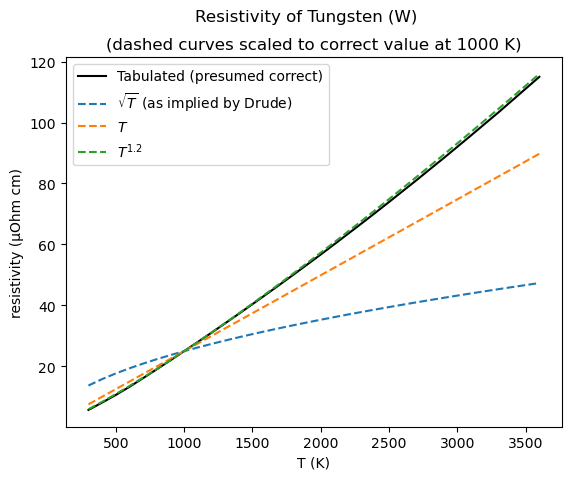

In [2]:
# The sqrt(T) dependence seems not to be correct, at least for W.

import matplotlib.pyplot as plt

# I found this data (unattributed) at https://rucsm.org/physics/labdescriptions/1640.pdf
# same data appears at https://hypertextbook.com/facts/2004/DeannaStewart.shtml
temp = np.array((3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36))*100
res = np.array((5.65, 8.06, 10.56, 13.23, 16.09, 19.00, 21.94, 24.93, 27.94, 30.98, 34.08, 37.19, 40.36, 
                43.55, 46.78, 50.05, 53.35, 56.67, 60.06, 63.48, 66.91, 
                70.39, 73.91, 77.49, 81.04, 84.70, 88.33, 92.04, 95.76, 99.54, 103.3, 107.2, 111.1, 115.0))
plt.figure()
plt.plot(temp,res, 'k', label='Tabulated (presumed correct)')
plt.plot(temp, np.sqrt(temp/1000)*24.93, '--', label=r'$\sqrt{T}$ (as implied by Drude)')
plt.plot(temp, (temp/1000)*24.93, '--', label=r'$T$')
plt.plot(temp, (temp/1000)**1.2*24.93, '--', label=r'$T^{1.2}$')
plt.xlabel('T (K)')
plt.ylabel('resistivity (µOhm cm)')
plt.suptitle('Resistivity of Tungsten (W)')
plt.title('(dashed curves scaled to correct value at 1000 K)')
plt.legend();